In [1]:
pip install textblob


  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.5.15-cp311-cp311-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.5.15-cp311-cp311-win_amd64.whl (268 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)


In [3]:
import os
import json
from textblob import TextBlob

# Directory containing the news data
current_dir = os.getcwd()
news_data_dir = os.path.join(current_dir, 'data', 'news')

# Function to load news data from a file
def load_news_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Function to perform sentiment analysis on news articles
def analyze_sentiment(article):
    title = article.get('title', '')
    description = article.get('description', '')
    text = str(title) + ' ' + str(description)
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Analyze sentiment for all articles of a specific ticker
def analyze_ticker_sentiment(ticker):
    file_path = os.path.join(news_data_dir, f'{ticker}_key_news.json')
    news_data = load_news_data(file_path)

    if news_data:
        sentiments = [analyze_sentiment(article) for article in news_data]
        if sentiments:
            average_sentiment = sum(sentiments) / len(sentiments)
            print(f"Average sentiment for {ticker}: {average_sentiment}")
            return average_sentiment
    print(f"No news data found or no sentiments for {ticker}")
    return None

# List of tickers
tickers = [
    "AAPL", "MSFT", "GOOGL", "GOOG", "NVDA", "AMZN", "META", "TSLA", "BRK-B",
    "V", "JNJ", "PG", "AVGO", "AMD", "ANET", "ODFL", "MNST", "DECK", "TSCO", "FICO"
]

# Perform sentiment analysis for each ticker
sentiment_results = {}
for ticker in tickers:
    sentiment = analyze_ticker_sentiment(ticker)
    if sentiment is not None:
        sentiment_results[ticker] = sentiment

# Display the sentiment results
print("\nSentiment Analysis Results:")
for ticker, sentiment in sentiment_results.items():
    print(f"{ticker}: {sentiment}")


Average sentiment for AAPL: 0.12498385642135645
Average sentiment for MSFT: 0.08853559102934103
Average sentiment for GOOGL: 0.0733276682642754
Average sentiment for GOOG: 0.09418733766233765
Average sentiment for NVDA: 0.08229897598433313
Average sentiment for AMZN: 0.1388105674087817
Average sentiment for META: 0.056206018518518516
Average sentiment for TSLA: 0.09694852994227993
Average sentiment for BRK-B: 0.048789231601731604
Average sentiment for V: 0.0874443362193362
Average sentiment for JNJ: 0.19229195526695528
Average sentiment for PG: 0.08037169238169238
Average sentiment for AVGO: 0.11442397618475003
Average sentiment for AMD: 0.107105781024531
Average sentiment for ANET: 0.1318702712452713
Average sentiment for ODFL: 0.1526316738816739
Average sentiment for MNST: 0.15902637987012988
Average sentiment for DECK: 0.15768309712773998
Average sentiment for TSCO: 0.1505400432900433
Average sentiment for FICO: 0.047622276334776344

Sentiment Analysis Results:
AAPL: 0.1249838564213

In [ ]:
# visualization of Sentiment


In [4]:
pip install matplotlib


  Using cached matplotlib-3.9.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp311-cp311-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.1-cp311-cp311-win_amd64.whl (8.0 MB)
Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl (188 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
Using cached pillow-10.4.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


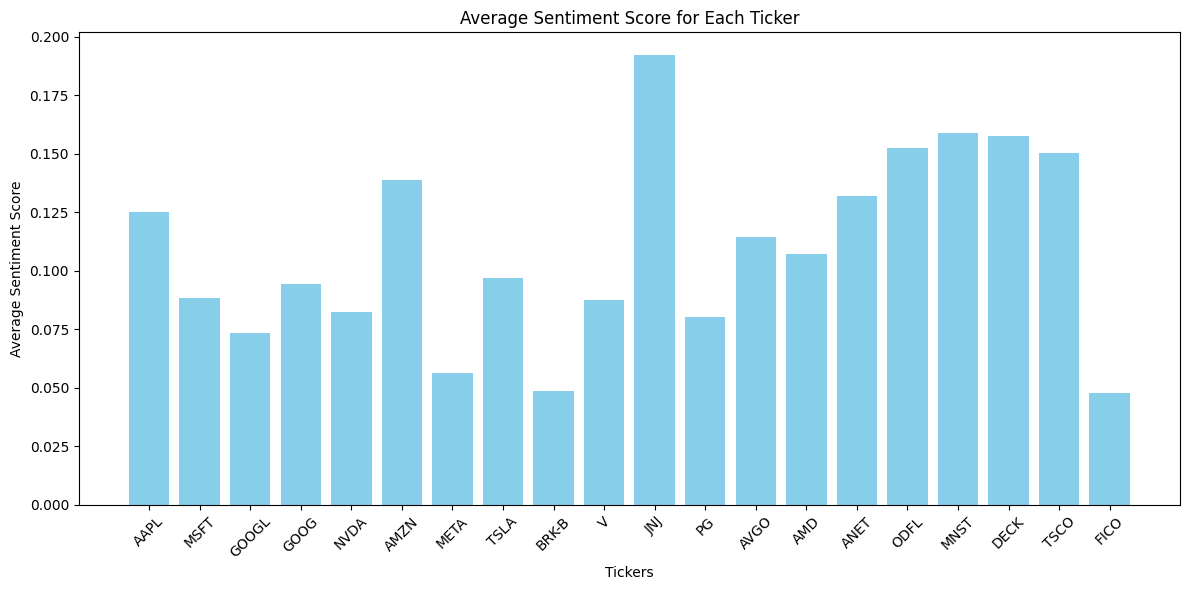

In [5]:
import matplotlib.pyplot as plt

# Data: Sentiment Analysis Results
sentiment_results = {
    "AAPL": 0.12498385642135645,
    "MSFT": 0.08853559102934103,
    "GOOGL": 0.0733276682642754,
    "GOOG": 0.09418733766233765,
    "NVDA": 0.08229897598433313,
    "AMZN": 0.1388105674087817,
    "META": 0.056206018518518516,
    "TSLA": 0.09694852994227993,
    "BRK-B": 0.048789231601731604,
    "V": 0.0874443362193362,
    "JNJ": 0.19229195526695528,
    "PG": 0.08037169238169238,
    "AVGO": 0.11442397618475003,
    "AMD": 0.107105781024531,
    "ANET": 0.1318702712452713,
    "ODFL": 0.1526316738816739,
    "MNST": 0.15902637987012988,
    "DECK": 0.15768309712773998,
    "TSCO": 0.1505400432900433,
    "FICO": 0.047622276334776344
}

# Extract tickers and sentiment scores
tickers = list(sentiment_results.keys())
sentiments = list(sentiment_results.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(tickers, sentiments, color='skyblue')
plt.xlabel('Tickers')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score for Each Ticker')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
